In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/coffee-sales-dataset/Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
df.shape

(3547, 11)

In [5]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [7]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


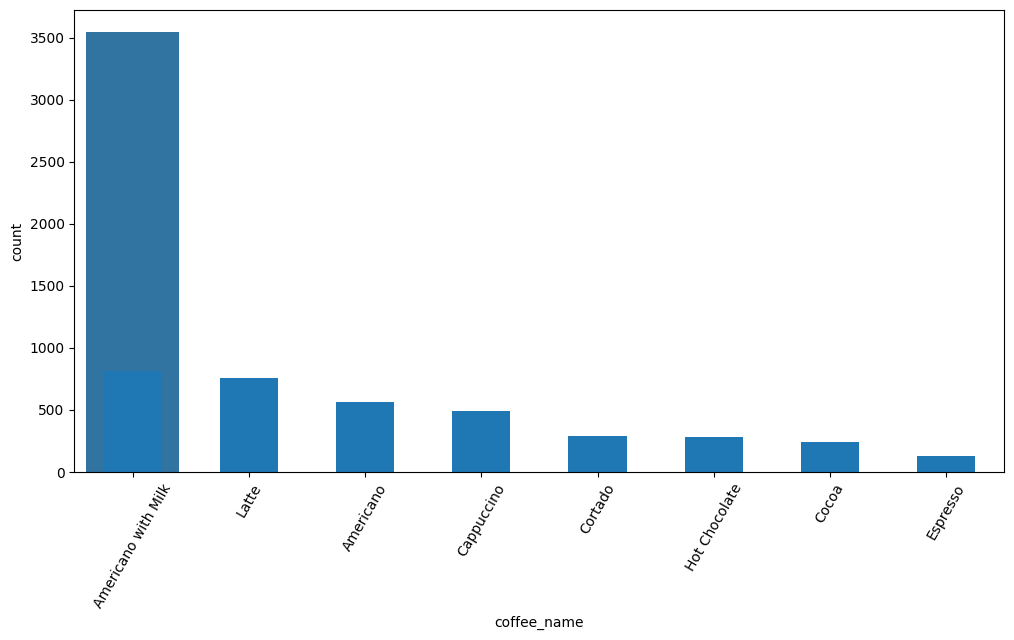

In [20]:
# Count plot for Coffee name
plt.figure(figsize=(12,6))
sns.countplot(x='cash_type', data=df)
df['coffee_name'].value_counts().plot(kind='bar')
plt.xticks(rotation=60) 
plt.show()

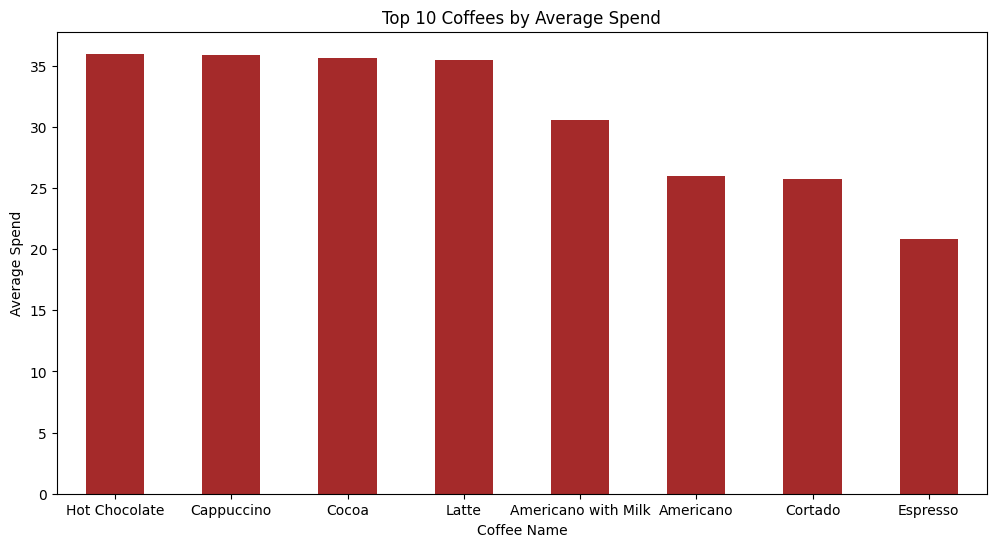

In [33]:
# Money vs coffee name
top10_coffee = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top10_coffee.plot(kind='bar', color='brown')
plt.xticks(rotation=0)
plt.ylabel("Average Spend")
plt.xlabel("Coffee Name")
plt.title("Top 10 Coffees by Average Spend")
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Afternoon'), Text(1, 0, 'Morning'), Text(2, 0, 'Night')])

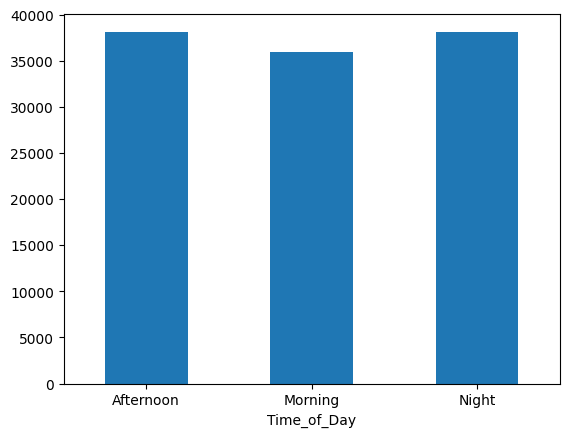

In [29]:
# Time of day vs sales
df.groupby('Time_of_Day')['money'].sum().plot(kind='bar')
plt.xticks(rotation = 0)

In [27]:
# Weekday vs sales
sales_by_weekday = df.groupby('Weekday')['money'].sum().sort_values(ascending=False)
print(sales_by_weekday)

Weekday
Tue    18168.38
Mon    17363.10
Fri    16802.66
Thu    16091.40
Wed    15750.46
Sat    14733.52
Sun    13336.06
Name: money, dtype: float64


<Axes: title={'center': 'Daily Coffee Sales'}, xlabel='Date'>

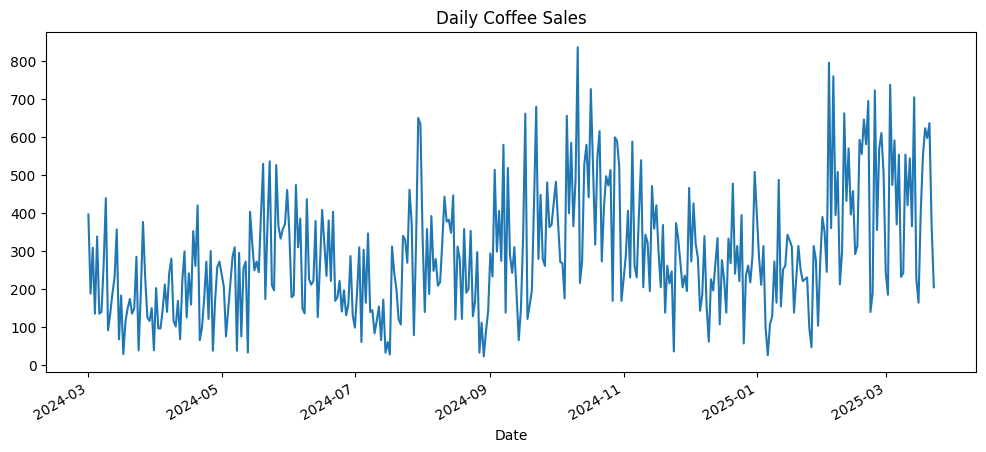

In [34]:
# Time series analysis
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['money'].sum()

daily_sales.plot(figsize=(12,5), title="Daily Coffee Sales")

<Axes: xlabel='hour_of_day'>

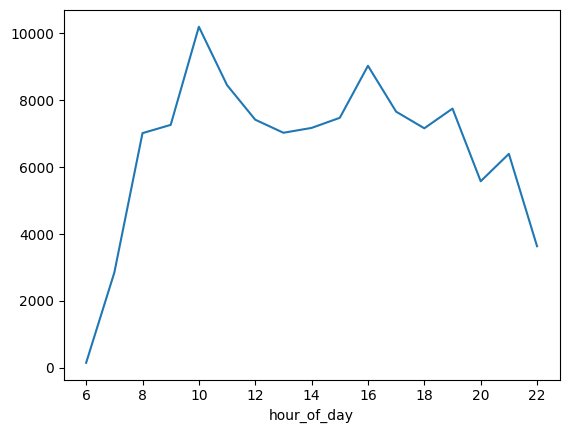

In [35]:
# Peak hrs of the day
df.groupby('hour_of_day')['money'].sum().plot(kind='line')

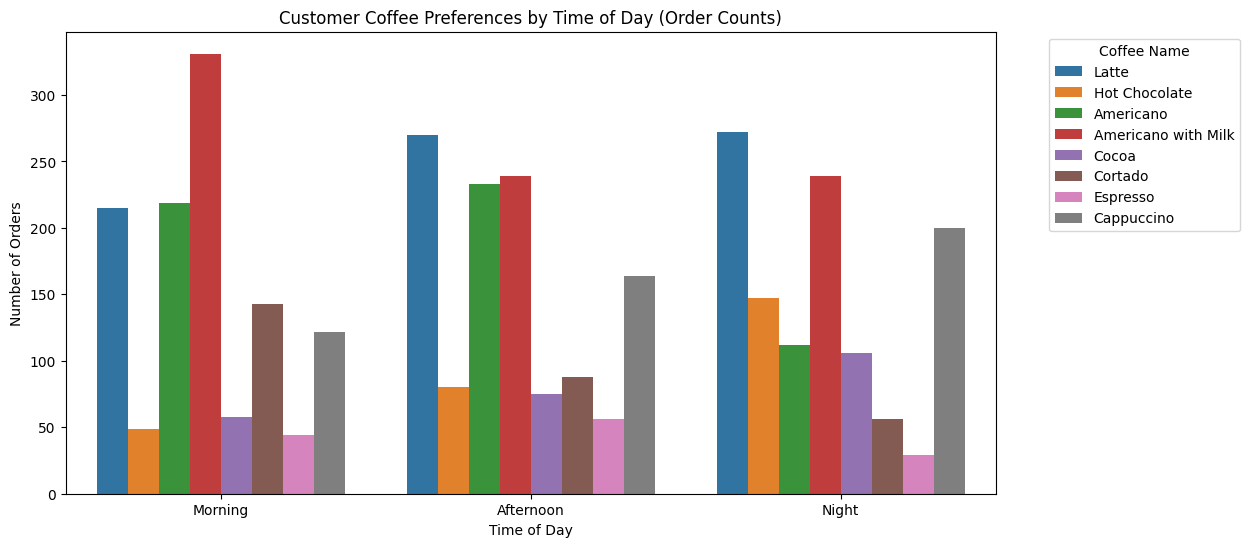

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Time_of_Day', hue='coffee_name', data=df)
plt.title("Customer Coffee Preferences by Time of Day (Order Counts)")
plt.ylabel("Number of Orders")
plt.xlabel("Time of Day")
plt.legend(title="Coffee Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [37]:
top_coffee_time = (
    df.groupby(['Time_of_Day', 'coffee_name'])['money']
      .sum()
      .reset_index()
      .sort_values(['Time_of_Day', 'money'], ascending=[True, False])
)

# Pick top coffee for each time of day
top_pref = top_coffee_time.groupby('Time_of_Day').head(1)
print(top_pref)

   Time_of_Day          coffee_name     money
7    Afternoon                Latte   9611.10
9      Morning  Americano with Milk  10025.52
23       Night                Latte   9614.02


**Insights**
1. Customers prefer mild & milk-based coffees to start their day, so Americano with milk has good sale in the morning. Promote breakfast combos to capture morning commuters.
2. Latte - people want refreshing or lighter drinks.Push iced variants and midday offers.
3. Latte and Espresso - customers prefer stronger or dessert-style drinks post-work.Market after-work energy boosters (Espresso shots, Mochas, and sweet treats).